In [1]:
# 课程笔记 01
# 课程链接：https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ
# 感谢Andrej Karpathy老师。

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 从数学角度看，机器学习模型本质上是在学习一个函数映射关系。
# 机器学习得到的函数就是这种映射关系的体现，而映射关系从数学上来讲，就是空间搜索和函数。
# 理解一个机器学习算法本质上需要理解模型、数据、优化三个要素对算法拟合目标函数性能的影响。训练这个方程式达到我们想要的效果。
# 深度学习的本质就是要通过学习数据来自动获得特征提取能力，因此我们需要大量数据。
# 导数，可以告诉我们瞬时变化率，也就是移动0.00001时函数上升/下降了多少，这是我们优化超大函数的基础
# 其中梯度下降算法是最为核心的优化方法。

In [4]:
# 这是一个基本的例子，描述了一个数据在训练过程中发生的事
# h是偏移量，在本例子中，它会影响x的走向
h = 0.001
x = 3.0
# 概念澄清：我们不是在找输入，而是在找参数。
#  - 输入数据是给定的（比如图片、文本等）
#  - 目标输出也是给定的（比如图片的类别标签）
#  - 我们要找的是那些能让神经网络对给定输入产生正确输出的参数（权重和偏置）
# 这是我们的小神经元函数
def f(x):
    return 3*x**2 - 4*x+5
# 我们训练的是函数的参数，而不是函数本身。
# 神经网络训练的本质是通过优化算法不断调整模型参数，使得模型对给定的数据进行更好的拟合。
# 神经网络的结构（比如有多少层、每层有多少神经元）是我们预先定义好的函数框架。
# 而训练过程就是在这个框架内寻找最优的参数值（权重和偏置），让这个函数能够最好地映射输入到输出。
# 每个神经元都是一个函数！每个神经元本质上是一个简单的函数。
# 它接收多个输入，对每个输入乘以对应的权重，加上偏置，然后通过一个激活函数（如ReLU、sigmoid等）产生输出。
# 这些简单的函数组合起来，形成了复杂的神经网络函数。
# 下面的函数就像一个小神经元在复杂的训练中发生的事。
f(x + h)

20.014003000000002

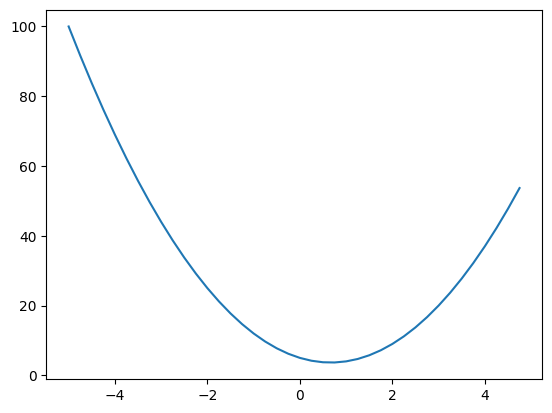

In [5]:
# 我们首先让他向上移动了一下（加法）
# 你觉得他是变大了还是变小了？下面是具体的函数图片，描述了xy的关系
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [6]:
# 嗯，大概是上升的，但是这是我们有图不是吗？
# 现在让我们用导数看一下他具体发生了什么（斜率）。
# 首先求出变化量fx：
fx = f(x + h) - f(x)
# 然后是斜率，通过变化量除以步长得到。
# 如果你打开维基百科，你会发现这其实就是复刻了导数公式。
slope = fx / h
print(f"{x}在该函数该点的近似斜率:", slope)
# 太棒了，这证明了我们的思考，斜率是正数，也就是函数在该点是上升的。

3.0在该函数该点的近似斜率: 14.00300000000243


In [7]:
# 现在试试-3，看看那时候是上升还是下降
x = -3
fx = f(x + h) - f(x)
slope = fx / h
print(f"{x}在该函数该点的近似斜率:", slope)
# 看来是下降的。

# 其实就是：
# 斜率 > 0 → 函数在上升 → 往右走，值增加
# 斜率 < 0 → 函数在下降 → 往右走，值减少

-3在该函数该点的近似斜率: -21.996999999998934


In [8]:
# 现在来点复杂的。
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


In [9]:
# 现在我们想再次查看d对a，b，c的导数，并再次思考这个导数告诉我们什么。
# 因此我们需要一个小h。
h = 0.0001

# 输入值
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c
a += h
d2 = a*b+c

slope = (d2 - d1)/h
print(f"a:\n d1:{d1}\n d2:{d2}\n slope:{slope}\n")

d1 = a*b+c
b += h
d2 = a*b+c

slope = (d2 - d1)/h
print(f"b:\n d1:{d1}\n d2:{d2}\n slope:{slope}\n")

d1 = a*b+c
c += h
d2 = a*b+c

slope = (d2 - d1)/h
print(f"c:\n d1:{d1}\n d2:{d2}\n slope:{slope}\n")

# 我们实际在做数值微分，也就是每次只改变一个变量，看看输出如何变化。h很小，所以近似斜率就是对应变量的偏导数。
# 导数很神奇，一点点的变化就会让他出现巨大的差别。
# a中我们加h让他变得更大，因为 b=-3 是负数，a增加，a*b变得更负，所以d2比d1小：d2 < d1。
# b中我们加h让他变得更小，b从-3增加到-2.9999（接近零），a*b变得更小的负数 → d2增加：d2 > d1。
# c中我们加h让他变得更大，c是常数项，增加h → d直接增加h。
# 这个故事告诉我们数学上的直觉要连很久很久，还是踏踏实实算吧。

a:
 d1:4.0
 d2:3.999699999999999
 slope:-3.000000000010772

b:
 d1:3.999699999999999
 d2:3.99990001
 slope:2.0001000000124947

c:
 d1:3.99990001
 d2:4.00000001
 slope:0.9999999999976694



In [28]:
# 是时候真正接触神经网络了
# 神经网络会涉及非常庞大的数学表达式，所以我们需要专属的数据结构来维护这些表达式。
# 现在我们开始构建它。


class Value:
    # Value 类：用于构建一个计算图中的节点（神经网络中常见的标量节点）。
    # Value 类是自动微分系统（autograd engine）的基本节点，
    # 支持任意复杂的数学表达式的自动求导（通过构建计算图并反向传播梯度）。

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data              # 节点存储的实际数值
        self.grad = 0.0               # 当前节点的梯度（反向传播后得到）
        self._backward = lambda: None # 会在每个有输入产生输出的小节点上执行链式法则，自动产生grad
        self._prev = set(_children)   # 该节点的直接前驱节点集合
        self._op = _op                # 生成该节点的操作符
        self.label = label            # 可选标签（如 'x', 'y', 'loss'）

    # 包装输出
    def __repr__(self):
        # 方便调试的输出：仅显示当前节点的数值。
        return f"Value(data={self.data})"

    # 基本算子重载
    # 加法
    def __add__(self, other):
        # 如果是一个普通的数字（1， 2， 3），我们将会把它包装成Value值。
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            # 为什么是+=？因为一个变量可能被调用两次。
            # 这样它的梯度就成了两条路径的梯度之和。
            # 直接使用=是覆盖梯度。
            # 在自动微分系统中，节点可能有多个父节点，因此必须使用累积梯度。
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
    
        return out

    # 处理减法
    def __sub__(self, other):
        return self + (-other)

    # 乘法
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out

    # 除法
    def __truediv__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        # 从数学上说，a/b = a * (1/b) = a * b**-1
        return self * other**-1


    # 幂运算
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "Only supporting int/float powers now."
        out = Value(self.data**other, (self, ), f'**{other}')

        def _backward():
            # 求导：dx/dy = n * x^(n-1)
            # x.grad = 上游梯度 * 导数
            self.grad += other * (self.data ** (other-1)) * out.grad
        out._backward = _backward

        return out

    # 调转运算
    def __radd__(self, other):
        return self + other

    # __remul__用来处理 2 * Value 的状态。
    # 当我们使用 Value * 2 的时候，解释器实际上看到的是 x.__mul__(2)
    # 这种情况下因为我们在代码中包装了它， 所以可以解决。
    # 但是当2.__mul__(x)时，我们无法解决2的类型问题。
    # 解释器会在这时候调用__rmul__，尝试交换两个数（将a*b变成b*a）
    # 这时候就又变成了x.__mul__(2)，问题解决。
    # 我们需要声明一下，告诉编译器我们知道怎么办：
    def __rmul__(self, other):
        return self * other

    def __rsub__(self, other):
        # other - self = other + (-self)
       return other + (-self)

    def __rtruediv__(self, other):
        # other / self = other * self**-1
        return self * other**-1

    # 处理负数数据（出现-x行为）
    def __neg__(self):
        return self * -1

    # 常用函数
    # 双曲正切函数
    def tanh(self):
        x = self.data
        # 自制的函数有溢出风险
        # t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        t = math.tanh(x)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        
        return out

    
    def relu(self):
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')
        
        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward
        
        return out

    # 指数函数的前向计算和反向传播规则。
    def exp(self):
        x = self.data
        # 对应数学指数函数：y = e^x
        # 计算出 e^x 并存入节点集
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            # x.grad = dx/dout * out.grad = e^x * out.grad
            # 我们的目标是计算出终极输出L对某个输入x的影响程度，
            # 也就是dx/dL，但是模型都是一小步一小步的，比如：L = ... = y = exp(x)
            # 所以要通过链式法则分解： dx/dL = dy/dL * dx/dy
            # dy/dL 是上游梯度，在正常状态下一被上游计算完，可以直接用，也就是out.gard。
            # dx/dy 是局部导数，也就是说我们要对 y = e^x 求导，
            # 根据维基：y = e^x => dx/dy = e^x，y求导后依旧是e^x
            # 所以最后就是 self.grad（自身梯度） = out.grad（上游梯度）* out.data（当前输出值e^x)
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    # 自动拓扑反向传播
    def backward(self):
        topo = []
        # 已访问的节点
        visited = set()
    
        def build_topo(v):
            # 递归地先访问节点的所有「前驱节点」 (_prev)，
            # 然后再把自己 (v) 加入到 topo 列表。
            if v not in visited:
                visited.add(v)
                for chiled in v._prev:
                    # 从左到右
                    # 递归调用自身检查每一个子节点
                    build_topo(chiled)
                    # [x1, w1, x2, w2, b, x1*w1, x2*w2, x1*w1 + x2*w2, n, o]
                    # 正向拓扑排序（topological order）
                topo.append(v)
        build_topo(self)
    
        # 输出对自己的梯度永远是 1
        self.grad = 1.0
        # 向前传播时数据从左往右流动（forward）
        # 反向传播时梯度传递方向就是从右往左流动（backward）
        # topo 列表是「正向拓扑顺序」。
        # 反向传播时，我们要从最终输出 o 开始，把梯度一层层传回去。
        # 所以要反转一下，不然就从x1开始backward，而x1后面没东西。
        for node in reversed(topo):
            node._backward()


# Value测试
a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10.0, label='c')

def test_base():
    print(f"{a}, {b}")
    print(a + b)
    print(a * b)

def test_other():
    print(a + 1)
    print(a * 1) 
    print(1 + a)
    print(1 * a)
    print(a - 1)
    print(a / 2) 
    print(1 - a)
    print(2 / a)
    print(a * -1)
    print(a.exp())
    print(a.tanh())

def test_backward():
    # 实际上，当a=2时，太大的值会出现消失梯度问题。
    # 这是双曲正切函数的问题，如果出现全是0的情况，请降低数值。
    a = Value(0.5, label='a') 
    
    # 表达式: td = tanh(exp(a**2))
    tb = a**2           # tb.data = 4.0, tb._prev = {a}
    tc = tb.exp()       # tc.data = e^4 ≈ 54.5982, tc._prev = {tb}
    td = tc.tanh()      # td.data = tanh(e^4) ≈ 1.0, td._prev = {tc}
    
    td.backward()
    
    print("--- 结果 ---")
    print(f"a: {a}")
    print(f"tb: {tb}")
    print(f"tc: {tc}")
    print(f"td: {td}")

    print("\n--- 梯度检查 ---")
    print(f"a.grad: {a.grad:.10f}")
    print(f"tb.grad: {tb.grad:.10f}")
    print(f"tc.grad: {tc.grad:.10f}")

In [29]:
# 表达式
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
# a*b = -6
# c = 10
# 让我们知道被计算出来前的最后一刻的最后数字
print(d._prev)
# 让我们知道d是由什么运算被计算出来
print(d._op)
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
# 现在我们知道了表达式是怎么被计算出来的
print(L)

{Value(data=-6), Value(data=10.0)}
+
Value(data=-8.0)


In [30]:
# 递归让我大脑发热，copys使我心情舒爽
# 这是给梯度地图用的
# 还有神经网络

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

测试：∂L/∂c ≈ -1.9999999999988916



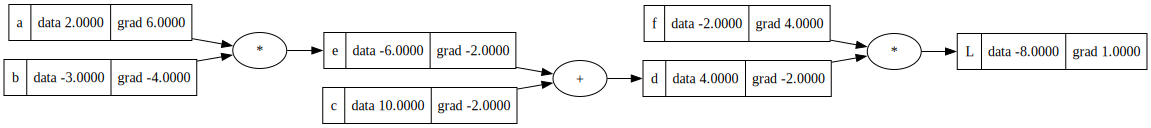

In [31]:
# 反向传播（手动链式法则）
# 如果我们让 c 增加一点点（比如 Δc）
# L 会变化约 ΔL ≈ ∂L/∂c × Δc
# 或者反之 Δc≈ ∂L/∂c / ΔL

# 创建变量节点
a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')
f = Value(-2, label='f')

# 构建表达式
e = a * b; e.label = 'e'       # e = a * b
d = e + c; d.label = 'd'       # d = e + c = a*b + c
L = d * f; L.label = 'L'       # L = d * f = (a*b + c) * f

# 手动反向传播（链式法则）
# 加法 = 1 × 上游梯度
# 乘法 = 另一个输入 × 上游梯度

# Step 1: 输出节点的梯度
# 输出对自己的梯度永远是 1
L.grad = 1.0

# Step 2: L = d * f
# 对乘法求局部导数：
# ∂L/∂d = f, ∂L/∂f = d
d.grad = f.data * L.grad  # dL/dd = f
f.grad = d.data * L.grad  # dL/df = d

# Step 3: d = e + c
# 对加法求局部导数：
# ∂d/∂e = 1, ∂d/∂c = 1
# 根据链式法则：
e.grad = 1 * d.grad        # dL/de = dL/dd * dd/de
c.grad = 1 * d.grad        # dL/dc = dL/dd * dd/dc

# Step 4: e = a * b
# 对乘法求局部导数：
# ∂e/∂a = b, ∂e/∂b = a
# 根据链式法则：
a.grad = b.data * e.grad    # dL/da = dL/de * de/da
b.grad = a.data * e.grad    # dL/db = dL/de * de/db

# 梯度数值验证 (使用有限差分法）
def numeric_gradient_check():
    h = 0.001

    # 先计算 L 原本的值
    a = Value(2, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    f = Value(-2, label='f')
    e = a * b; e.label = 'e'       # e = a * b
    d = e + c; d.label = 'd'       # d = e + c = a*b + c
    L = d * f; L.label = 'L'       # L = d * f = (a*b + c) * f
    L1 = L.data

    # 再对 c 做一个微小变化 h
    a = Value(2, label='a')
    b = Value(-3, label='b')
    c = Value(10 + h, label='c')
    f = Value(-2, label='f')
    e = a * b; e.label = 'e'       # e = a * b
    d = e + c; d.label = 'd'       # d = e + c = a*b + c
    L = d * f; L.label = 'L'       # L = d * f = (a*b + c) * f
    L2 = L.data

    # 输出差分比率
    numeric_grad_c = (L2 - L1) / h
    print(f"测试：∂L/∂c ≈ {numeric_grad_c}\n")

numeric_gradient_check()

# 在我们手搓的反向传播里 ∂c/∂L = f; f = -2，所以增加 c 一点点，L 会下降约 2 倍这个微小变化
# 用 (L2 - L1)/h 可以近似得到 -2 → 验证梯度是否正确。
# 梯度告诉我们“每增加一点 c，L 会增加/减少多少”
# 所以它告诉我们“更新 c 的方向和幅度”
# 也就是说，假如说我们对例子是一个庞大神经网络的神经元，当我们算出反向传播的地图。
# 我们就会知道拨动某个值会发生什么事，比如拨动 c += 2， c就会成倍的 * -2（真的+=2 L 会下降 4 个单位）

# 也就是说，我们的L在这里是数字，在别处可能就是图片，文字，或者任何东西（但在计算机眼里都是数字）

# 梯度地图：
draw_dot(L)

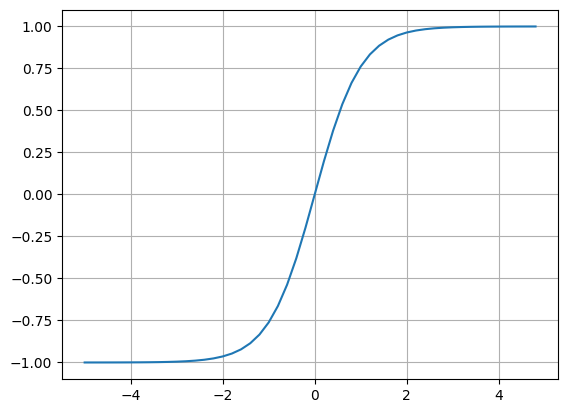

In [32]:
# 常用激活函数tanh
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

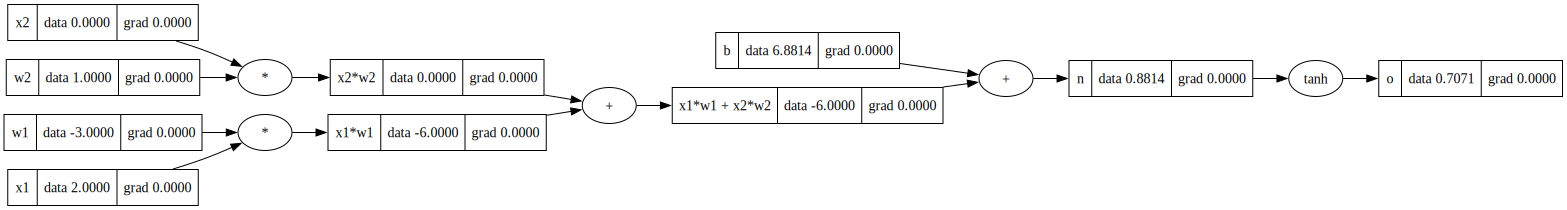

In [33]:
# 构筑一个简单的单神经元（单层感知机）

# 输入信号（可以是特征值，比如图片像素或其它数值）
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# 权重（weight），控制每个输入的重要性。大权重 → 输入影响大，小权重 → 输入影响小
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# 偏置（bias），让神经元在没有输入或者输入为零时也能输出非零信号
# 从数学角度，bias 是线性组合的偏移量，让模型有更多灵活性去拟合数据。
# 如果没有 bias，神经元输出严格依赖输入，神经网络的表达能力就受限制。
# bias 让神经元即便没有输入（或者输入为 0），也能有输出。
# 就像给大脑注入多巴胺，它保证神经元不会完全“睡着”，即便其他信号都为 0，也能活跃起来。
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
# 将各个输入加权求和，得到总输入（线性组合）
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# 激活函数，把线性组合转换成非线性输出，允许神经网络学习复杂函数
# 激活函数 = “控制兴奋 / 非线性变换”
# 激活函数把线性组合结果映射到一个非线性范围。
# 它的作用简单说就是：“让大的变小一点，让小的变大一点”也就是压缩输出范围（例如 tanh 的 [-1,1]），这有几个好处：
# - 防止数值爆炸（太大或太小的值导致训练不稳定）
# - 提供非线性，否则多层网络叠加仍然等价于线性模型
# - 活力控制：激活函数能让神经元对小的输入稍微响应，对大的输入趋近饱和，保证梯度不会完全消失（当然 tanh 对非常大输入会有轻微饱和，需要注意梯度消失问题）
# 激活函数保证了神经元输出有变化，从而梯度可以反向传播，神经网络才能学习。也好后续训练。
o = n.tanh(); o.label = 'o'

# 神经元图
draw_dot(o)

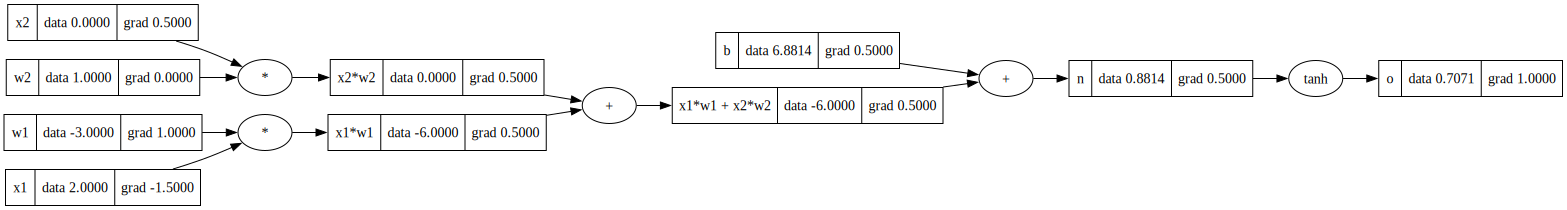

In [34]:
def reset_value():
    x1.grad = 0.0
    x2.grad = 0.0
    w1.grad = 0.0
    w2.grad = 0.0
    b.grad = 0.0
    x1w1.grad = 0.0
    x2w2.grad = 0.0
    x1w1x2w2.grad = 0.0
    n.grad = 0.0
    o.grad = 0.0

reset_value()

# 现在，我们要反向传播，并填充所有梯度。
# 那么对于所有输入，对o的导数是什么？
# 在大多数情况下，我们最关心的是权重的对o对导数。
# 因为它们是我们将会进行优化的目标，在本例子中，就是w1和w2。
# 这只是一个很小的神经元，在我们即将接触真正的神经网络中，会有一个损失函数来衡量神经网络的准确率。
# 我们根据这个准确率进行反向传播，并试图提高它。

o.grad = 1.0
o._backward() # 计算 n 的梯度
n._backward() # 计算 x1w1x2w2 和 b 的梯度
x1w1x2w2._backward() # 计算 x1w1, x2w2 的梯度
x1w1._backward() # ...
x2w2._backward()

# 神经元图
draw_dot(o)

[Value(data=6.881373587019543), Value(data=2.0), Value(data=-3.0), Value(data=-6.0), Value(data=1.0), Value(data=0.0), Value(data=0.0), Value(data=-6.0), Value(data=0.8813735870195432), Value(data=0.7071067811865476)]




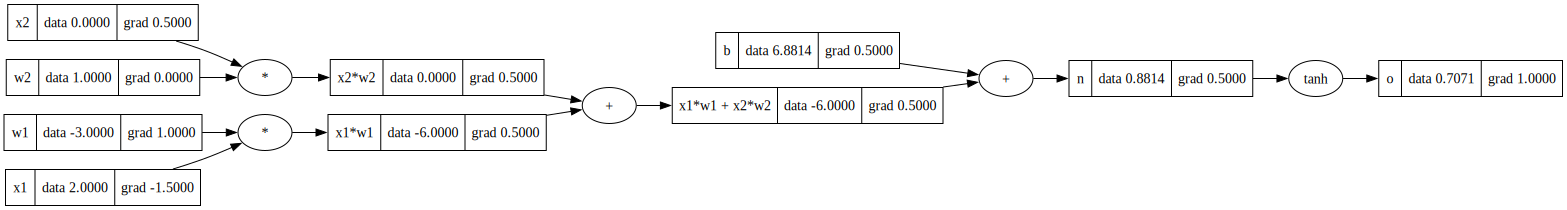

In [35]:
# 自动拓扑反向传播
reset_value()

topo = []
# 已访问的节点
visited = set()

def build_topo(v):
    # 递归地先访问节点的所有「前驱节点」 (_prev)，
    # 然后再把自己 (v) 加入到 topo 列表。
    if v not in visited:
        visited.add(v)
        for chiled in v._prev:
            # 从左到右
            # 递归调用自身检查每一个子节点
            build_topo(chiled)
            # [x1, w1, x2, w2, b, x1*w1, x2*w2, x1*w1 + x2*w2, n, o]
            # 正向拓扑排序（topological order）
        topo.append(v)

build_topo(o)
print(f"{topo}\n\n")

o.backward()
draw_dot(o)

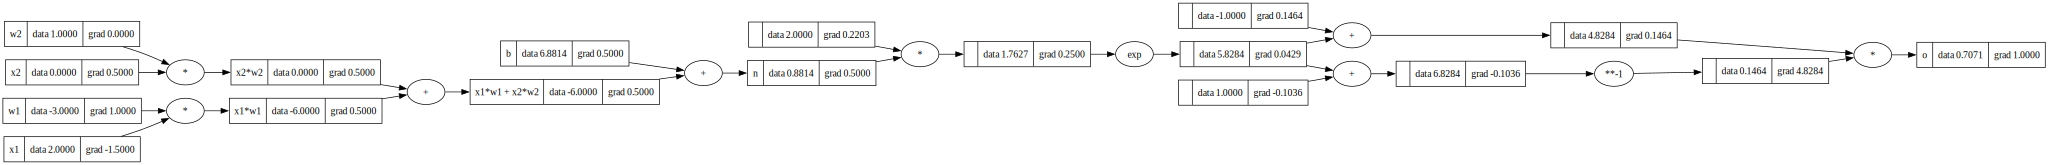

In [36]:
# 这个例子展示了中间发生什么是可以被精确控制的
# 并且保证结果不变
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e - 1) / (e + 1); o.label = 'o'
o.backward()
draw_dot(o)

In [37]:
# 进入现代社会
# 是时候用tourch来代替我们简陋的Value了
# 我们的Value基于标量，但是torch里的一切都是张量
import torch

# 所以这里会稍微复杂一点，因为我们需要把标量变为张量
# 0维张量：标量（单个数值）
# 1维张量：向量（一维数组）
# 2维张量：矩阵（二维数组）
# 3维及以上张量：高阶张量（多维数组）
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [38]:
# 在深度学习中，张量是一种多维数据结构，
# 用于在神经网络模型中表示和存储数据，
# 可以被视为向量和矩阵的高维推广。
# 2维张量（也就是矩阵）
torch.Tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [61]:
import random

# 构建神经网络
# 是时候构建神经网络了，我们已经有了构建神经网络所需要的一切，
# 我们将逐步构建一个两层多层感知器，
# 我们先要实现一个符合pytorch api风格的神经元。
class Neuron:
    # nin 是神经元的输入数量，也就是能接受多少个输入，
    # 我们为每个输入构建一个权重，从-1到1之间的随机数，
    # 当然，还有必备的偏值。
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    # 当我们调用 f(x) 时，编译器会默认调用 __call__ 方法
    # 例如我们现在创建一个二维神经元和两个输入：
    # x = [1.0, 2.0]
    # n = Neuron(2)
    # n(x) -> 这时候就会调用 __call__ 方法。
    def __call__(self, x):
        # 我们首先要进行向前传播。
        # w * x + b
        # 将 w 的所有元素与 x 的所有元素两两相乘 
        # zip将会创建一个迭代器，遍历输入进来的元组 
        # 例如，w = [?, ?], x = [2, 3]，
        # zip将会创建一个list进行两两配对
        # [(Value(data=-0.1519860568157867), 2.0), (Value(data=-0.752612965018634), 3.0)]
        # 原始激活值：
        # 因为sum里有self.b所以实际上会从b的值开始累加
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        # 进行非线性转换
        # return act.relu()
        out = act.tanh()
        return out

    # 神经网络的所有参数
    def parameters(self):
        return  self.w + [self.b]

# 神经元层，实际上就是一个神经元列表
class Layer:
    # nin代表有几个输入
    # nout代表你想拥有多少神经元在这一层（有几个输出）
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    # 本层的所有参数
    def parameters(self):
        params = []
        for neuron in self.neurons:
            ps = neuron.parameters()
            params.extend(ps)
        return params

# 现在我们开始制作多层感知器 MLP
class MLP:
    # 我们依旧接受输入数量，但不接受单个输出（也就是单层神经元的数量），
    # 我们现在会接受一个输出列表，这个列表定义了MLP中所有层的大小，
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [62]:
# 例如：输入层(3) → 隐藏层1(4) → 隐藏层2(4) → 输出层(1)
# nin = 3
# nout = [4, 4, 1]
# sz = [3] + [4, 4, 1] = [3, 4, 4, 1]
# sz = [nin] + nout

# 创建layers：
# i=0: Layer(sz[0], sz[1]) = Layer(3, 4)  # 第1层：3输入→4输出
# i=1: Layer(sz[1], sz[2]) = Layer(4, 4)  # 第2层：4输入→4输出  
# i=2: Layer(sz[2], sz[3]) = Layer(4, 1)  # 第3层：4输入→1输出
# self.layers = [
#     Layer(3, 4),  # 第一个隐藏层
#     Layer(4, 4),  # 第二个隐藏层
#     Layer(4, 1)   # 输出层
# ]

x = [2.0, 3.0, -1.0]  # 3个输入特征
n = MLP(3, [4, 4, 1])  # 网络结构：3→4→4→1

# 我天，终于做出来一个MLP了

In [63]:
# 如何调整权重让他输出我们想要的结果
# 我们需要一个新的值：损失，它可以帮我们衡量整个神经网络的性能

# 数据集
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # 期望的目标

# 我们靠梯度下降降低损失
# 梯度下降的核心思想是：沿着损失函数下降最快的方向调整参数
# 参数 = 参数 - 学习率 × 损失对参数的梯度

# 1. 计算预测值
ypred = [n(x) for x in xs]

# 2. 计算损失（均方误差）
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])

# 3. 反向传播：计算梯度
# - 计算损失函数对每个参数的偏导数（梯度）
# - 这些梯度告诉我们：每个参数应该如何调整才能降低损失
# - 例如：如果某个权重的梯度是正的，意味着增加这个权重会增加损失，我们应该减少它
loss.backward()

# 4. 梯度下降更新参数
# 参数 = 参数 - 学习率 × 梯度
for p in n.parameters():
    p.data -= 0.01 * p.grad

In [64]:
print("输入样本 xs:")
for i, x in enumerate(xs):
    print(f"样本 {i+1}: {x}")

print("\n神经网络预测结果:")
ypred = []
for i, x in enumerate(xs):
    pred = n(x)
    ypred.append(pred)
    print(f"样本 {i+1} 输入 {x} → 预测 {pred}")

print(f"\n最终 ypred = {ypred}")

输入样本 xs:
样本 1: [2.0, 3.0, -1.0]
样本 2: [3.0, -1.0, 0.5]
样本 3: [0.5, 1.0, 1.0]
样本 4: [1.0, 1.0, -1.0]

神经网络预测结果:
样本 1 输入 [2.0, 3.0, -1.0] → 预测 Value(data=0.657766022300429)
样本 2 输入 [3.0, -1.0, 0.5] → 预测 Value(data=0.9534477129325348)
样本 3 输入 [0.5, 1.0, 1.0] → 预测 Value(data=0.8848889834774404)
样本 4 输入 [1.0, 1.0, -1.0] → 预测 Value(data=0.7228189171625597)

最终 ypred = [Value(data=0.657766022300429), Value(data=0.9534477129325348), Value(data=0.8848889834774404), Value(data=0.7228189171625597)]


In [65]:
# 完整的学习过程
for epoch in range(100):  # 迭代100次
    # 前向传播
    ypred = [n(x) for x in xs]
    
    # 计算损失
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
    
    # 清零梯度（重要！）
    # 如果不清理梯度，我们参数更新的就没意义了。
    for p in n.parameters():
        p.grad = 0.0
    
    # 反向传播
    loss.backward()
    
    # 参数更新
    for p in n.parameters():
        # 梯度 ∂L/∂w 告诉我们：当前参数下，损失函数对参数的变化率
        # 它指向损失增加最快的方向，所以我们需要反向更新参数
        #  - 如果 p.grad > 0，增加这个参数会让损失变大
        #  - 如果 p.grad < 0，增加这个参数会让损失变小
        # 正是因为我们想要减少损失，所以我们需要向梯度的反方向更新参数：
        p.data -= 0.1 * p.grad
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 7.5627178953709775
Epoch 10, Loss: 0.08464566796181773
Epoch 20, Loss: 0.026870593090597916
Epoch 30, Loss: 0.015437787030580834
Epoch 40, Loss: 0.010696954468308359
Epoch 50, Loss: 0.008133254301122569
Epoch 60, Loss: 0.006536758263619817
Epoch 70, Loss: 0.0054509769698250395
Epoch 80, Loss: 0.004666555428436987
Epoch 90, Loss: 0.004074345416815814


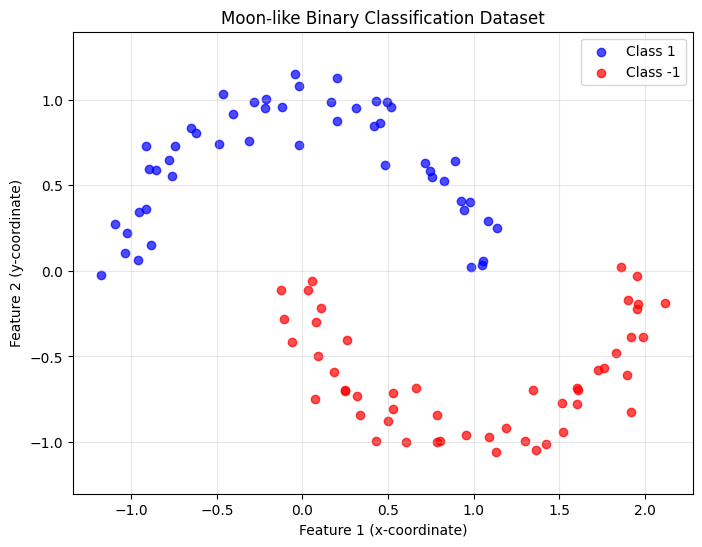

In [66]:
# 二元分类神经网络 - 月牙形数据集生成与可视化
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可重复性
# 随机种子42是一个常用的"魔法数字"，在机器学习中广泛使用
np.random.seed(42)

# 数据集参数设置
n_samples = 100  # 总样本数，每个类别各50个样本
noise = 0.1      # 噪声标准差，控制数据点的分散程度

# 生成第一个半圆（类别1）- 上半圆

# 生成从0到π的均匀分布角度，共n_samples//2个点
# 角度范围：θ ∈ [0, π]
# 数学公式：θ₁ = linspace(0, π, n/2)
# 当θ从0变化到π时：
#   - θ=0: (cos(0), sin(0)) = (1, 0)  # 右端点
#   - θ=π/2: (cos(π/2), sin(π/2)) = (0, 1)  # 顶部
#   - θ=π: (cos(π), sin(π)) = (-1, 0)  # 左端点
theta1 = np.linspace(0, np.pi, n_samples//2)

# 生成x坐标：x = cos(θ) + 高斯噪声
# 数学公式：x₁ = cos(θ₁) + ε, 其中 ε ~ N(0, noise²)
# cos(θ)生成半圆的x坐标，标准高斯噪声增加随机性
x1 = np.cos(theta1) + np.random.normal(0, noise, n_samples//2)

# 生成y坐标：y = sin(θ) + 高斯噪声
# 数学公式：y₁ = sin(θ₁) + ε, 其中 ε ~ N(0, noise²)
# sin(θ)生成半圆的y坐标，由于θ∈[0,π]，sin(θ)≥0，形成上半圆
y1 = np.sin(theta1) + np.random.normal(0, noise, n_samples//2)

# 生成第二个半圆（类别-1）- 下半圆，向右偏移

# 生成相同范围的角度，用于第二个半圆
theta2 = np.linspace(0, np.pi, n_samples//2)

# 生成x坐标：x = cos(θ) + 1.0 + 高斯噪声
# 数学公式：x₂ = cos(θ₂) + 1 + ε, 其中 ε ~ N(0, noise²)
# +1.0将整个半圆向右平移1个单位，避免与第一个半圆重叠
x2 = np.cos(theta2) + 1.0 + np.random.normal(0, noise, n_samples//2)

# 生成y坐标：y = -sin(θ) + 高斯噪声
# 数学公式：y₂ = -sin(θ₂) + ε, 其中 ε ~ N(0, noise²)
# 负号使半圆翻转到x轴下方，形成下半圆
# 当θ从0到π时：
#   - θ=0: (cos(0)+1, -sin(0)) = (2, 0)  # 右端点
#   - θ=π/2: (cos(π/2)+1, -sin(π/2)) = (1, -1)  # 底部
#   - θ=π: (cos(π)+1, -sin(π)) = (0, 0)  # 左端点
y2 = -np.sin(theta2) + np.random.normal(0, noise, n_samples//2)

# 合并数据集

# 将两个类别的特征合并为一个特征矩阵X
# X的形状为(n_samples, 2)，每行是一个样本的[x, y]坐标
# np.column_stack将x和y坐标组合成二维特征
# np.vstack将两个类别的数据垂直堆叠
X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))

# 生成标签向量y
# 类别1（上半圆）标签为1，类别-1（下半圆）标签为-1
# np.hstack水平合并两个标签数组
# 最终y的形状为(n_samples,)，包含50个1和50个-1
y = np.hstack((np.ones(n_samples//2), -np.ones(n_samples//2)))

# 数据可视化

# 创建图形，设置大小为8x6英寸
plt.figure(figsize=(8, 6))

# 绘制类别1（标签为1）的样本点，蓝色
# X[y == 1]选择所有标签为1的样本
# [:, 0]取x坐标，[:, 1]取y坐标
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Class 1', alpha=0.7)

# 绘制类别-1（标签为-1）的样本点，红色
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='red', label='Class -1', alpha=0.7)

# 设置图表标题
plt.title('Moon-like Binary Classification Dataset')

# 设置坐标轴标签
plt.xlabel('Feature 1 (x-coordinate)')
plt.ylabel('Feature 2 (y-coordinate)')

# 添加图例
plt.legend()

# 添加网格线，透明度设为0.3
plt.grid(True, alpha=0.3)

# 设置坐标轴比例相等，确保圆形不被拉伸变形
plt.axis('equal')

# 显示图形
plt.show()

# 数学总结
# 这个数据集生成了两个月牙形的二元分类问题：

# 类别1（蓝色，上半圆）：
#  x₁(θ) = cos(θ) + εₓ
#  y₁(θ) = sin(θ) + εᵧ
#  其中 θ ∈ [0, π], εₓ, εᵧ ~ N(0, noise²)

# 类别-1（红色，下半圆，向右偏移）：
#  x₂(θ) = cos(θ) + 1 + εₓ
#  y₂(θ) = -sin(θ) + εᵧ
#  其中 θ ∈ [0, π], εₓ, εᵧ ~ N(0, noise²)

# 这种数据集的特点：
# 1. 非线性可分：无法用一条直线将两个类别完全分开
# 2. 月牙形状：两个类别形成类似新月的形状
# 3. 有噪声：每个数据点都添加了高斯噪声，模拟真实数据的不确定性
# 4. 平衡数据集：两个类别样本数相等

# 这个数据集非常适合测试神经网络等非线性分类器的性能，因为：
# - 线性分类器（如逻辑回归）无法很好地分离这两个类别
# - 需要至少一个隐藏层的神经网络才能学习这种复杂的决策边界
# - 决策边界应该是曲线形状，能够绕过两个半圆之间的间隙

In [70]:
# 初始化模型：2个输入特征，2个隐藏层（每层16个神经元），1个输出
# [16, 16, 1] 表示：第一层16个神经元，第二层16个神经元，输出层1个神经元
model = MLP(2, [16, 16, 1])  # 严格来说这是3层神经网络（2个隐藏层+1个输出层）
print("参数数量: ", len(model.parameters()))  # 打印模型总参数数量

# Loss函数定义
# batch_size参数控制每次计算损失时使用的样本数量
# 当batch_size=None时，使用整个数据集进行全批量梯度下降
def loss(batch_size=None):
    # 计算模型的损失值，包含数据损失和正则化损失，同时返回准确率
    # 参数:
    #  - batch_size: int or None - 批量大小，None表示使用全部数据
    # 返回:
    #  - total_loss: Value - 总损失（数据损失 + 正则化损失）
    # accuracy: float - 当前批量的分类准确率
    
    # ============================== 数据加载部分 ==============================
    if batch_size is None:
        # 全批量模式：使用整个数据集
        Xb, yb = X, y  # X是特征矩阵，y是标签向量
        # 用于计算全批量损失（Full-batch loss）
        # 优点：梯度精确，收敛稳定
        # 缺点：计算量大，内存占用高
    else:
        # 小批量模式：随机选择batch_size个样本
        # X.shape[0]：获取数据集的总样本数（100个）
        # np.random.permutation(100)：生成0-99的随机排列，例如[42, 15, 78, 3, ..., 99]
        # [:batch_size]：取前batch_size个索引，实现随机采样
        # 数学表示：I ~ Uniform({1,2,...,N})，无放回抽样
        ri = np.random.permutation(X.shape[0])[:batch_size]
        
        # 根据随机索引选择样本
        # X[ri]：形状为(batch_size, 2)，选择batch_size个样本的特征
        # y[ri]：形状为(batch_size,)，选择对应的标签
        Xb, yb = X[ri], y[ri]
        # 这是随机梯度下降(SGD)或小批量梯度下降的核心步骤
        # 优点：计算效率高，有正则化效果
        # 缺点：梯度估计有噪声

    # ============================== 数据预处理部分 ==============================
    # 将输入数据转换为Value对象，用于自动微分计算图
    # 逐行处理：对Xb中的每一行（一个样本的特征向量）
    # 例如：xrow = [0.8, 0.6] 表示一个样本的两个特征
    # map(Value, xrow)：将每个特征值转换为Value对象
    #   Value(0.8) 和 Value(0.6)
    # list(...)：将map结果转换为列表
    # 最终inputs结构：[[Value(x11), Value(x12)], [Value(x21), Value(x22)], ...]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # ============================== 前向传播部分 ==============================
    # 计算每个样本的预测分数（logits）
    scores = []
    for input_sample in inputs:
        # input_sample: [Value(x1), Value(x2)] - 一个样本的2个特征
        # model(input_sample): 通过神经网络计算预测分数
        # 输出为单个Value对象，表示该样本的logit值
        # 对于二元分类，score > 0 预测为类别1，score < 0 预测为类别-1
        score = model(input_sample)  # 对单个样本进行预测
        scores.append(score)
    
    # ============================== 损失计算部分 - 核心！ ==============================
    # 这里使用的是支持向量机（SVM）的Hinge Loss（合页损失）
    # 数学公式：
    # L_i = max(0, 1 - y_i · f(x_i))
    #其中：
    # - y_i ∈ {-1, +1} 是真实标签
    # - f(x_i) 是模型预测的分数（logit）
    # - 1 - y_i · f(x_i) 是间隔距离
    # 损失解释：
    # 1. 当 y_i · f(x_i) ≥ 1 时，L_i = 0
    #   表示样本被正确分类且间隔足够大
    # 2. 当 y_i · f(x_i) < 1 时，L_i = 1 - y_i · f(x_i) > 0
    #   表示样本被错误分类或间隔不够大，需要优化
    # 为什么使用这个损失？
    # - SVM的"最大间隔"原则：不仅要求正确分类，还要求分类间隔最大化
    # - 比简单的0-1损失更平滑，可微分
    # - 对异常值相对鲁棒
    
    # 计算每个样本的Hinge Loss
    # 注意：我们的标签y是{-1, +1}，不是{0, 1}
    # (1 + -yi*scorei).relu() 等价于 max(0, 1 - yi * scorei)
    # 详细分解：
    #   -yi * scorei: 计算负的预测分数乘以真实标签
    #   1 + (-yi * scorei): 等价于 1 - yi * scorei
    #   .relu(): 等价于 max(0, x)，即ReLU激活函数
    
    # 示例计算：
    # 情况1: yi = 1, scorei = 1.5
    #   1 - (1)(1.5) = 1 - 1.5 = -0.5
    #   max(0, -0.5) = 0  ✅ 正确分类且间隔足够
    
    # 情况2: yi = 1, scorei = 0.5  
    #   1 - (1)(0.5) = 0.5
    #   max(0, 0.5) = 0.5  ⚠️ 需要优化
    
    # 情况3: yi = -1, scorei = -1.5
    #   1 - (-1)(-1.5) = 1 - 1.5 = -0.5
    #   max(0, -0.5) = 0  ✅ 正确分类
    
    # 情况4: yi = -1, scorei = 0.5
    #   1 - (-1)(0.5) = 1 + 0.5 = 1.5
    #   max(0, 1.5) = 1.5  ❌ 错误分类
    
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    
    # 计算平均数据损失
    # sum(losses): 将所有样本的损失相加
    # * (1.0 / len(losses)): 除以样本数，得到平均损失
    # 数学公式：L_data = (1/N) * Σ max(0, 1 - y_i · f(x_i))
    data_loss = sum(losses) * (1.0 / len(losses))
    
    # ============================== 正则化部分 ==============================
    # L2正则化（权重衰减）
    # 数学公式：L_reg = (α/2) * Σ w_j²
    
    # 其中：
    # - α (alpha) 是正则化系数，控制正则化强度
    # - w_j 是模型的所有参数（权重和偏置）
    
    # 作用：
    # 1. 防止过拟合：惩罚大的权重值
    # 2. 提高泛化能力：使模型参数分布更平滑
    # 3. 数值稳定性：避免权重过大导致数值问题
    
    # 为什么使用L2？
    # - 比L1正则化更平滑，优化更稳定
    # - 对应于权重的高斯先验（贝叶斯视角）
    # - 在深度学习中广泛使用
    
    # 注意：代码中省略了1/2系数，因为alpha可以调整

    alpha = 1e-4  # 正则化系数，较小的值表示轻微的正则化
    # 计算所有参数的平方和：Σ p² for p in model.parameters()
    # alpha * sum(...): 乘以正则化系数
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    
    # ============================== 总损失计算 ==============================
    # 总损失 = 数据损失 + 正则化损失
    # L_total = L_data + L_reg
    total_loss = data_loss + reg_loss
    
    # ============================== 准确率计算 ==============================
    # 准确率计算：
    # - (yi > 0): 检查真实标签是否为正类（类别1）
    # - (scorei.data > 0): 检查预测分数是否大于0（预测为类别1）
    # - (yi > 0) == (scorei.data > 0): 比较预测和真实标签是否一致
    #  True表示正确分类，False表示错误分类
    
    # 最终准确率 = 正确分类的样本数 / 总样本数
    
    #注意：使用.scorei.data获取原始数值，而不是Value对象
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    accuracy_value = sum(accuracy) / len(accuracy)  # 计算平均准确率
    
    return total_loss, accuracy_value

# 调用loss函数，使用全批量模式（batch_size=None）
total_loss, acc = loss()
print(f"总损失: {total_loss.data:.4f}, 准确率: {acc:.4f}")

参数数量:  337
总损失: 0.7106, 准确率: 0.6700


In [72]:
# 优化
for k in range(100):
    
    # 向前传播
    total_loss, acc = loss()
    
    # 向后传播
    # 清零梯度
    for p in n.parameters():
        p.grad = 0.0
    
    total_loss.backward()
    
    # 更新 (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        # 梯度下降
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"第 {k} 步; 损失：{total_loss.data}; 准确度 {acc*100}%")



第 0 步; 损失：0.4226441107144886; 准确度 97.0%
第 1 步; 损失：0.4284256092038552; 准确度 97.0%
第 2 步; 损失：0.43406472234268456; 准确度 97.0%
第 3 步; 损失：0.43955817246539436; 准确度 97.0%
第 4 步; 损失：0.4449029502814054; 准确度 97.0%
第 5 步; 损失：0.45009631192801364; 准确度 97.0%
第 6 步; 损失：0.4551357757116228; 准确度 97.0%
第 7 步; 损失：0.4600191185527498; 准确度 97.0%
第 8 步; 损失：0.4647443721504828; 准确度 97.0%
第 9 步; 损失：0.4693098188840167; 准确度 97.0%
第 10 步; 损失：0.473713987486282; 准确度 97.0%
第 11 步; 损失：0.47795564872572066; 准确度 97.0%
第 12 步; 损失：0.48203381432229897; 准确度 97.0%
第 13 步; 损失：0.4859477992961122; 准确度 97.0%
第 14 步; 损失：0.48969875693423176; 准确度 97.0%
第 15 步; 损失：0.4933295003905248; 准确度 97.0%
第 16 步; 损失：0.49711231546479545; 准确度 97.0%
第 17 步; 损失：0.49995414081727124; 准确度 97.0%
第 18 步; 损失：0.50304369743645; 准确度 97.0%
第 19 步; 损失：0.5059695655102233; 准确度 97.0%
第 20 步; 损失：0.5087321947539096; 准确度 97.0%
第 21 步; 损失：0.5113324676829022; 准确度 97.0%
第 22 步; 损失：0.513771447391027; 准确度 97.0%
第 23 步; 损失：0.5160503707161079; 准确度 97.0%
第 24 步; 损失：0.518170641

(-2.056508940678367, 1.9434910593216328)

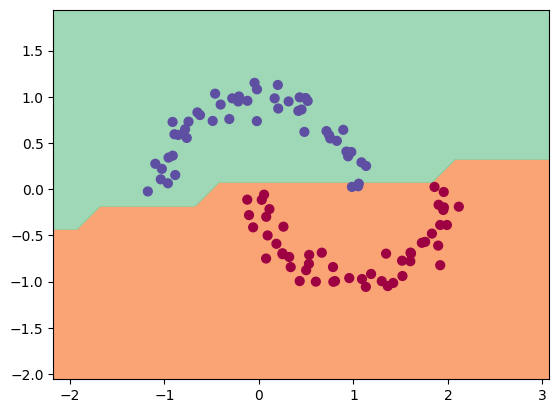

In [73]:
# visualize decision boundary
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())